In [1]:
import numpy as np
import pyUngewiss as ung

In [2]:
def HockettSherby(p, x):
    sigma = p[0]+p[1]-p[1]*np.exp(-p[2]*x**p[3])
    return([sigma])

In [3]:
def FunHockettSherby(pUnc):
    Prob = ung.UncertainAnalysis(HockettSherby, pUnc)
    Prob.deltax = 1e-3
    Prob.epsStop = 1e-3
    nS = 150
    epsilonMax = 0.5
    epsilon = np.linspace(0, epsilonMax, nS)
    rFnUnc = [[]]*nS
    nEvaluation = 0
    for i, val in enumerate(epsilon):
        Prob.para = val
        Prob.calculate()
        rFnUnc[i] = Prob.rUnc
        nEvaluation += Prob.nEval
    Prob.rFnUnc = rFnUnc
    Prob.nEval = nEvaluation
    Prob.epsilon = epsilon
    return(Prob)

In [4]:
sigmaYInt = ung.UncertainNumber([240, 260])
sigmaPInt = ung.UncertainNumber([40, 60])
cHSInt = ung.UncertainNumber([8,12])
nHSInt = ung.UncertainNumber([0.7, 0.8])
pInt = [sigmaYInt, sigmaPInt, cHSInt, nHSInt]

In [5]:
nAlpha = 6
sigmaYFuzz = ung.UncertainNumber([230, 240, 260, 270], Form="trapazoid", nalpha=nAlpha)
sigmaPFuzz = ung.UncertainNumber([35, 40, 60, 65], Form="trapazoid", nalpha=nAlpha)
cHSFuzz = ung.UncertainNumber([7, 8, 12, 13], Form="trapazoid", nalpha=nAlpha)
nHSFuzz = ung.UncertainNumber([0.6, 0.7, 0.8, 0.9], Form="trapazoid", nalpha=nAlpha)
pFuzz = [sigmaYFuzz, sigmaPFuzz, cHSFuzz, nHSFuzz]

In [6]:
ProbInt = FunHockettSherby(pInt)

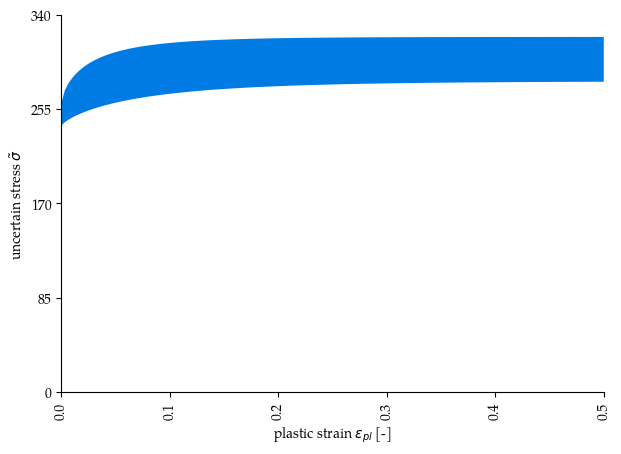

In [7]:
plt = ung.plotUncertainFn(ProbInt.rFnUnc, ProbInt.epsilon, ylimits=[0, 340], 
                          xlimits=[0, np.max(ProbInt.epsilon)],
                          xlabel="plastic strain $\\varepsilon_{pl}$ [-]",
                          ylabel="uncertain stress $\\tilde{\\sigma}$")

In [8]:
ProbFuzz = FunHockettSherby(pFuzz)

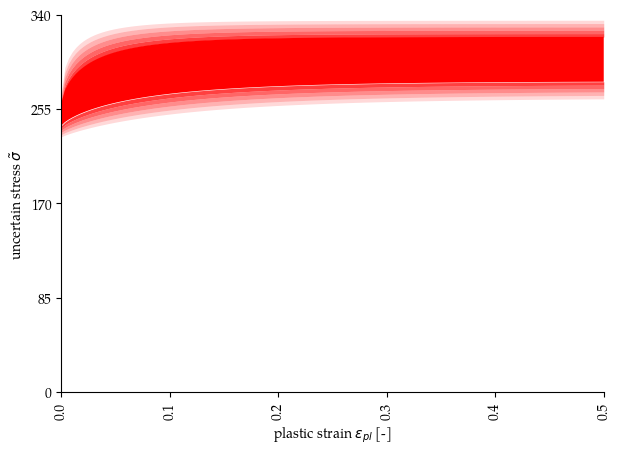

In [10]:
plt = ung.plotUncertainFn(ProbFuzz.rFnUnc, ProbFuzz.epsilon, ylimits=[0, 340],
                          xlimits=[0, np.max(ProbFuzz.epsilon)], color="r",
                          xlabel="plastic strain $\\varepsilon_{pl}$ [-]",
                          ylabel="uncertain stress $\\tilde{\\sigma}$")